In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [2]:
prsa_data = pd.read_csv("C:\\Users\\CoolerMaster\\Downloads\\PRSA_Data.csv")
prsa_data.head()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,RAIN,wd,WSPM,AQI Label
0,0,1,6.0,28.0,400.0,51.577659,1023.0,0.0,NNW,4.4,Severely Polluted
1,1,2,6.0,28.0,400.0,50.403851,1023.2,0.0,N,4.7,Severely Polluted
2,2,3,-1.0,19.0,400.0,54.923321,1023.5,0.0,NNW,5.6,Severely Polluted
3,3,4,8.0,14.0,-1.0,-1.000000,1024.5,0.0,NW,3.1,Excellent
4,4,5,9.0,-1.0,300.0,54.296608,1025.2,0.0,N,2.0,Heavily Polluted


In [3]:
prsa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  35064 non-null  int64  
 1   No          35064 non-null  int64  
 2   SO2         35064 non-null  float64
 3   NO2         35064 non-null  float64
 4   CO          35064 non-null  float64
 5   O3          35064 non-null  float64
 6   PRES        35064 non-null  float64
 7   RAIN        35064 non-null  float64
 8   wd          35064 non-null  object 
 9   WSPM        35064 non-null  float64
 10  AQI Label   35064 non-null  object 
dtypes: float64(7), int64(2), object(2)
memory usage: 2.9+ MB


In [4]:
prsa_data.describe()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17531.500000,17532.500000,18.058734,63.236861,1251.121692,45.876835,1010.520250,0.067653,1.500217
std,10122.249256,10122.249256,22.558126,39.109232,1269.033556,54.730861,26.289217,0.896833,1.105382
min,0.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,8765.750000,8766.750000,4.000000,34.000000,500.000000,2.397428,1002.500000,0.000000,0.800000
50%,17531.500000,17532.500000,10.000000,58.000000,900.000000,27.356346,1010.800000,0.000000,1.200000
75%,26297.250000,26298.250000,22.276800,87.000000,1500.000000,69.548316,1019.400000,0.000000,2.000000
max,35063.000000,35064.000000,282.000000,264.000000,10000.000000,363.769133,1040.300000,72.500000,11.200000


In [5]:
prsa_data[prsa_data == -1] = np.nan
prsa_data.head()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,RAIN,wd,WSPM,AQI Label
0,0,1,6.0,28.0,400.0,51.577659,1023.0,0.0,NNW,4.4,Severely Polluted
1,1,2,6.0,28.0,400.0,50.403851,1023.2,0.0,N,4.7,Severely Polluted
2,2,3,NaN,19.0,400.0,54.923321,1023.5,0.0,NNW,5.6,Severely Polluted
3,3,4,8.0,14.0,NaN,NaN,1024.5,0.0,NW,3.1,Excellent
4,4,5,9.0,NaN,300.0,54.296608,1025.2,0.0,N,2.0,Heavily Polluted


<AxesSubplot:xlabel='SO2', ylabel='Count'>

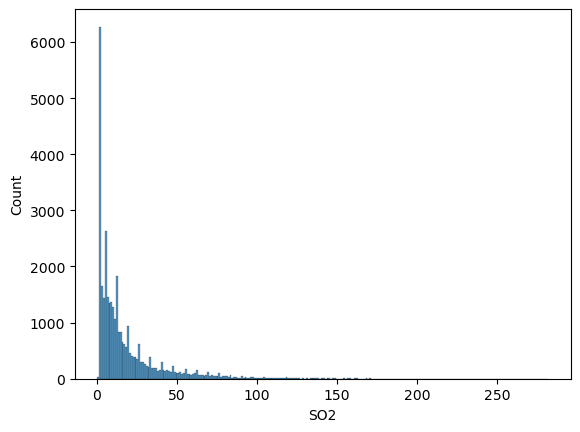

In [6]:
sns.histplot(prsa_data.SO2)

<AxesSubplot:xlabel='NO2', ylabel='Density'>

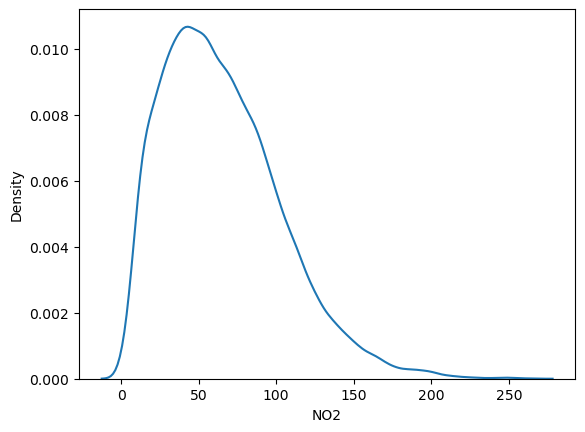

In [7]:
sns.kdeplot(prsa_data.NO2)

<AxesSubplot:xlabel='CO', ylabel='Count'>

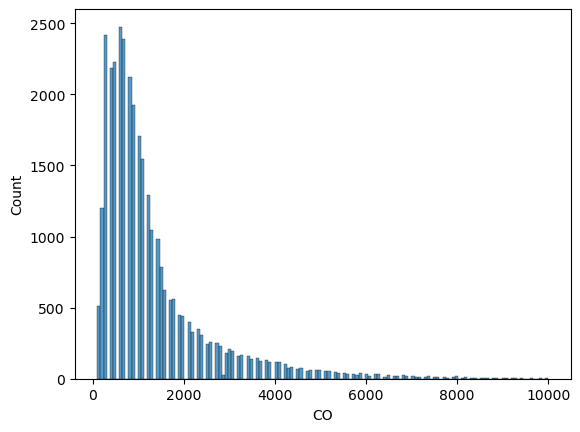

In [8]:
sns.histplot(prsa_data.CO)

<AxesSubplot:xlabel='O3', ylabel='Count'>

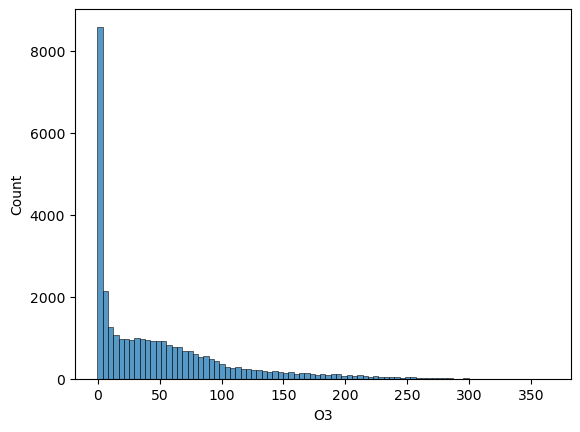

In [9]:
sns.histplot(prsa_data.O3)

<AxesSubplot:xlabel='PRES', ylabel='Count'>

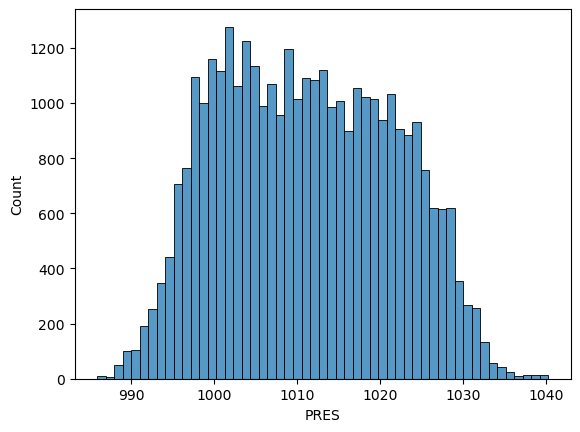

In [10]:
sns.histplot(prsa_data.PRES)

<AxesSubplot:xlabel='RAIN', ylabel='Count'>

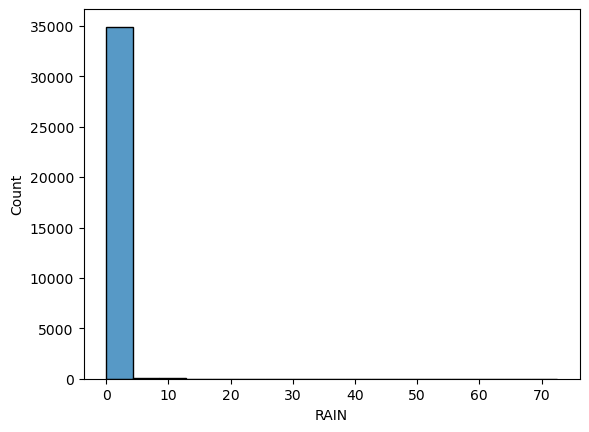

In [11]:
sns.histplot(prsa_data.RAIN)

<AxesSubplot:xlabel='WSPM', ylabel='Count'>

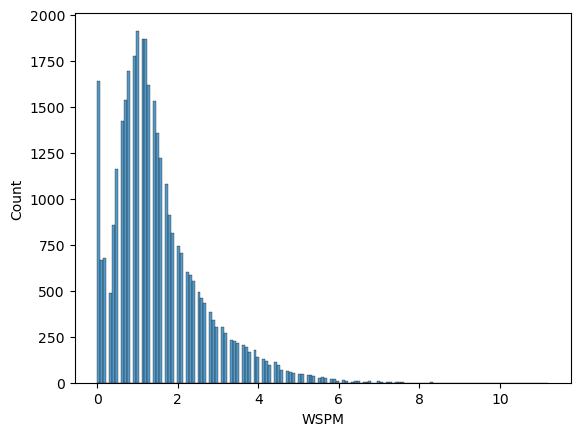

In [12]:
sns.histplot(prsa_data.WSPM)

In [13]:
prsa_data.RAIN[prsa_data.RAIN > 0]

267      0.1
268      0.4
269      0.1
270      0.9
271      0.9
        ... 
34891    0.2
34892    0.7
34893    0.9
34894    0.4
34895    0.2
Name: RAIN, Length: 1436, dtype: float64

In [14]:
is_rain = np.array(prsa_data.RAIN)
is_rain[is_rain > 0] = 1
prsa_data['IS_RAIN'] = is_rain
prsa_data.drop(['RAIN'], axis=1, inplace=True)
prsa_data.describe()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,WSPM,IS_RAIN
count,35064.000000,35064.000000,34489.000000,33994.000000,33252.000000,32957.000000,35044.000000,35050.000000,35044.000000
mean,17531.500000,17532.500000,18.376481,65.258789,1319.353513,48.873754,1011.097536,1.501215,0.040977
std,10122.249256,10122.249256,22.609648,37.996088,1268.114331,55.113576,10.355247,1.104472,0.198240
min,0.000000,1.000000,0.285600,1.642400,100.000000,-0.275160,985.900000,0.000000,0.000000
25%,8765.750000,8766.750000,4.000000,36.000000,500.000000,3.579219,1002.500000,0.800000,0.000000
50%,17531.500000,17532.500000,10.000000,60.000000,900.000000,31.945652,1010.800000,1.200000,0.000000
75%,26297.250000,26298.250000,23.000000,88.000000,1600.000000,72.876079,1019.400000,2.000000,0.000000
max,35063.000000,35064.000000,282.000000,264.000000,10000.000000,363.769133,1040.300000,11.200000,1.000000


<AxesSubplot:xlabel='SO2', ylabel='Density'>

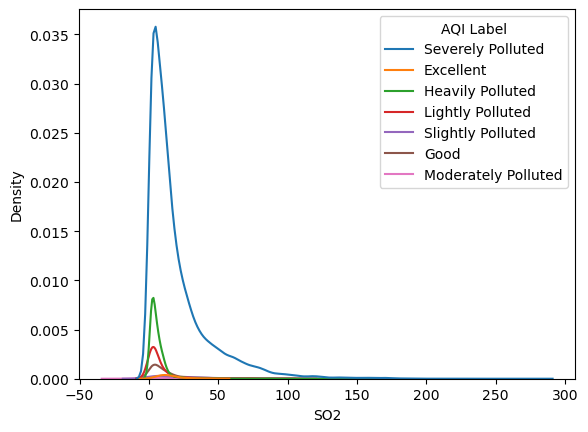

In [15]:
sns.kdeplot(data=prsa_data, x="SO2", hue="AQI Label")

<AxesSubplot:xlabel='NO2', ylabel='Density'>

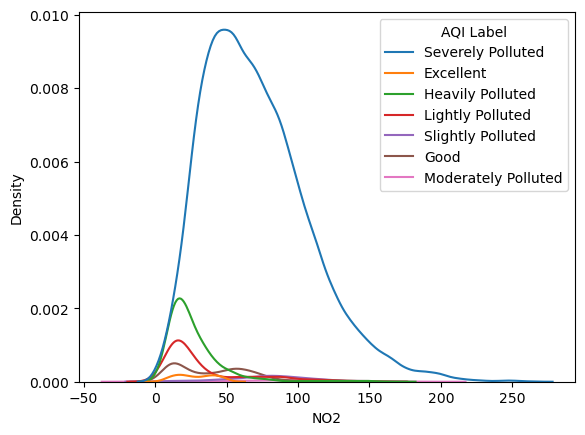

In [16]:
sns.kdeplot(data=prsa_data, x="NO2", hue="AQI Label")

<AxesSubplot:xlabel='CO', ylabel='Density'>

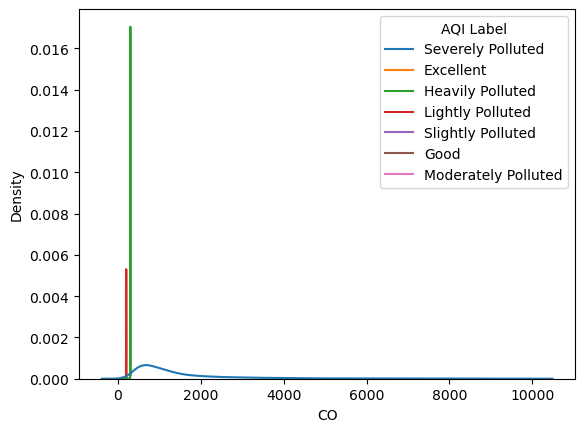

In [17]:
sns.kdeplot(data=prsa_data, x="CO", hue="AQI Label")

<AxesSubplot:xlabel='CO', ylabel='Density'>

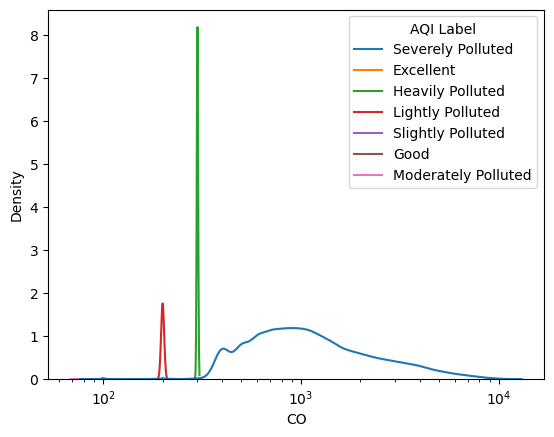

In [18]:
sns.kdeplot(data=prsa_data, x="CO", hue="AQI Label", log_scale=True)

<AxesSubplot:xlabel='O3', ylabel='Density'>

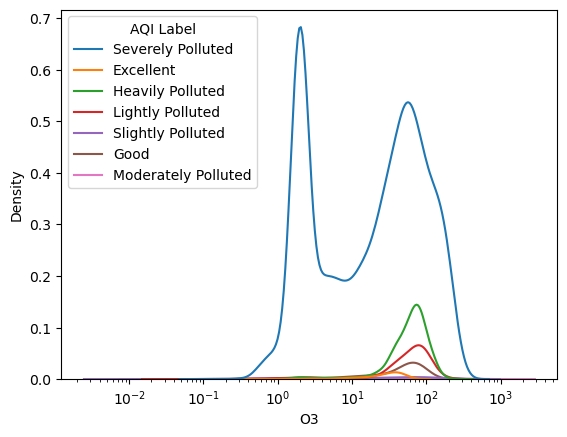

In [19]:
sns.kdeplot(data=prsa_data, x="O3", hue="AQI Label", log_scale=True)

In [20]:
bin_ranges = [0, 250, 320, 10000]
bin_names = [1, 2, 3]
prsa_data['CO_bin_custom_label'] = pd.cut(np.array(prsa_data['CO']), 
                                               bins=bin_ranges, labels=bin_names)
prsa_data.head()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label
0,0,1,6.0,28.0,400.0,51.577659,1023.0,NNW,4.4,Severely Polluted,0.0,3
1,1,2,6.0,28.0,400.0,50.403851,1023.2,N,4.7,Severely Polluted,0.0,3
2,2,3,NaN,19.0,400.0,54.923321,1023.5,NNW,5.6,Severely Polluted,0.0,3
3,3,4,8.0,14.0,NaN,NaN,1024.5,NW,3.1,Excellent,0.0,NaN
4,4,5,9.0,NaN,300.0,54.296608,1025.2,N,2.0,Heavily Polluted,0.0,2


In [21]:
prsa_data['CO_bin_custom_label'] = prsa_data['CO_bin_custom_label'].values.add_categories(0)
prsa_data['CO_bin_custom_label'] = prsa_data['CO_bin_custom_label'].fillna(0).astype(int)
prsa_data.head()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label
0,0,1,6.0,28.0,400.0,51.577659,1023.0,NNW,4.4,Severely Polluted,0.0,3
1,1,2,6.0,28.0,400.0,50.403851,1023.2,N,4.7,Severely Polluted,0.0,3
2,2,3,NaN,19.0,400.0,54.923321,1023.5,NNW,5.6,Severely Polluted,0.0,3
3,3,4,8.0,14.0,NaN,NaN,1024.5,NW,3.1,Excellent,0.0,0
4,4,5,9.0,NaN,300.0,54.296608,1025.2,N,2.0,Heavily Polluted,0.0,2


In [22]:
prsa_data.PRES[prsa_data.PRES <= 992] = 992
prsa_data.PRES[prsa_data.PRES >= 1034] = 1034

<AxesSubplot:xlabel='PRES', ylabel='Count'>

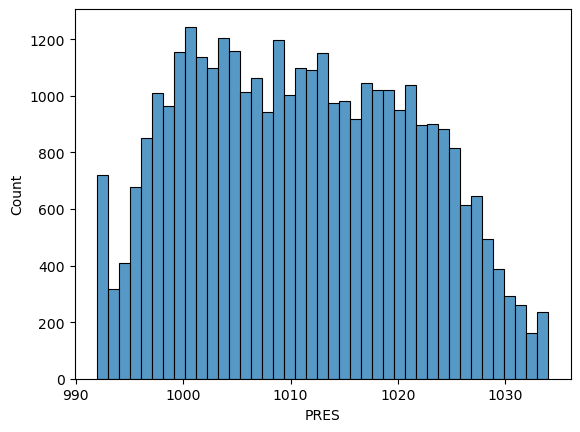

In [23]:
sns.histplot(prsa_data.PRES)

<AxesSubplot:>

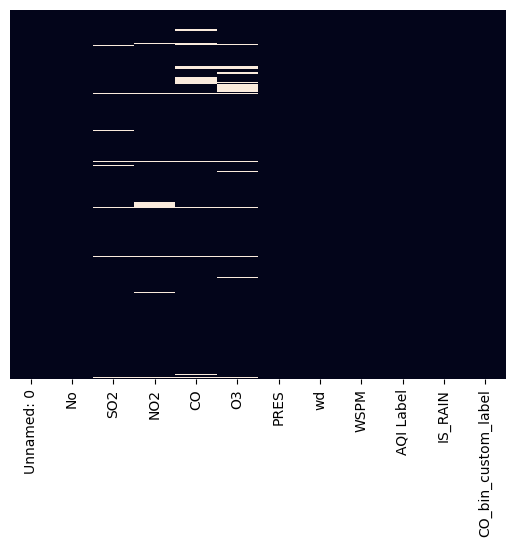

In [24]:
sns.heatmap(prsa_data.isnull(), yticklabels=False, cbar=False)

In [25]:
undef = prsa_data.isnull().sum(axis=1)
undef[undef >= 2]

3        2
276      3
435      2
459      2
555      2
        ..
34880    4
34883    4
34885    4
35029    2
35030    2
Length: 884, dtype: int64

In [26]:
prsa_data = prsa_data.drop(undef[undef >= 2].index, axis=0)

<AxesSubplot:>

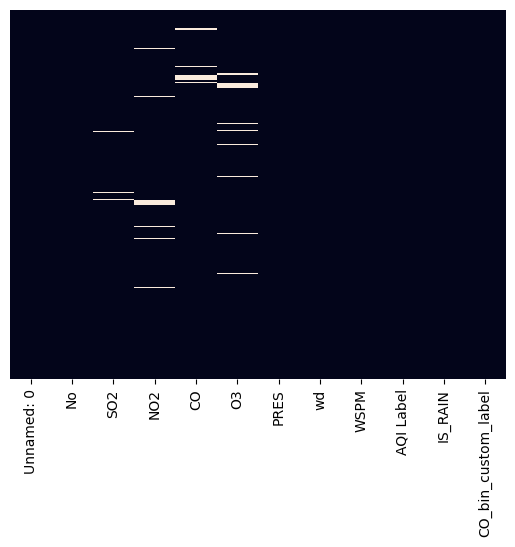

In [27]:
sns.heatmap(prsa_data.isnull(), yticklabels=False, cbar=False)

In [28]:
prsa_data.isnull().sum()

Unnamed: 0                0
No                        0
SO2                     281
NO2                     702
CO                     1028
O3                     1300
PRES                      0
wd                        0
WSPM                      0
AQI Label                 0
IS_RAIN                   0
CO_bin_custom_label       0
dtype: int64

In [29]:
prsa_data.SO2 = prsa_data.SO2.fillna(prsa_data.PRES.mean())
filler = prsa_data.O3[prsa_data.O3.isna()]
filler = prsa_data.O3[~prsa_data.O3.isna()].sample(n=len(filler)).set_axis(filler.index)
filler 

436      123.483963
460      132.937755
556        1.579691
652        4.268493
748        4.435667
            ...    
33124      7.747032
33220     42.708779
33604      2.035340
33892     29.346392
35031     45.336461
Name: O3, Length: 1300, dtype: float64

In [30]:
prsa_data.O3 = prsa_data.O3.fillna(filler)

<AxesSubplot:xlabel='O3', ylabel='Count'>

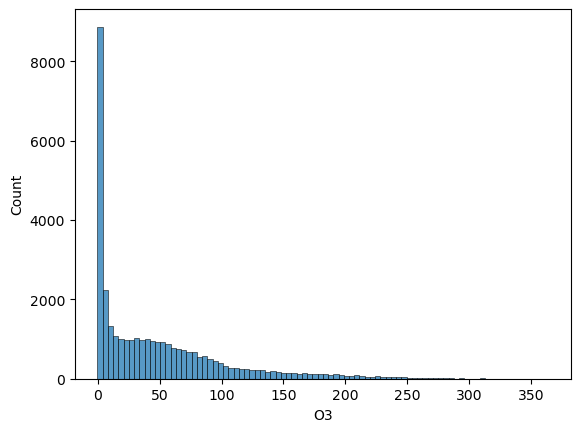

In [31]:
sns.histplot(prsa_data.O3)

In [32]:
prsa_data['O3'] = np.array(np.round((prsa_data['O3'])), dtype='int')
prsa_data.head()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label
0,0,1,6.000000,28.0,400.0,52,1023.0,NNW,4.4,Severely Polluted,0.0,3
1,1,2,6.000000,28.0,400.0,50,1023.2,N,4.7,Severely Polluted,0.0,3
2,2,3,1011.055986,19.0,400.0,55,1023.5,NNW,5.6,Severely Polluted,0.0,3
4,4,5,9.000000,NaN,300.0,54,1025.2,N,2.0,Heavily Polluted,0.0,2
5,5,6,8.000000,17.0,300.0,54,1025.6,N,3.7,Heavily Polluted,0.0,2


In [33]:
prsa_data.SO2 = np.log(prsa_data.SO2)

<AxesSubplot:xlabel='SO2', ylabel='Count'>

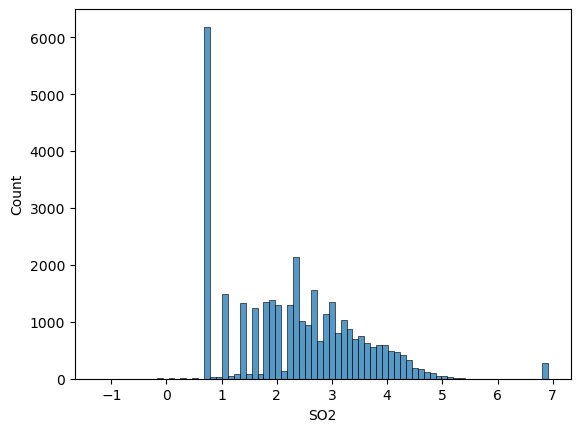

In [34]:
sns.histplot(prsa_data.SO2)

# Задания для самостоятельного выполнения

# 1. При выполнении 3 и 5 заданий используйте другие методы визуализации. Найдите самый подходящий тип графика для каждого распределения.


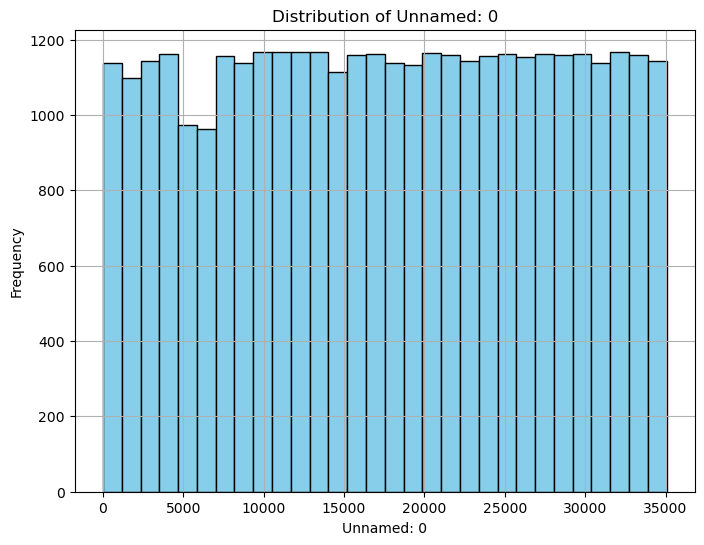

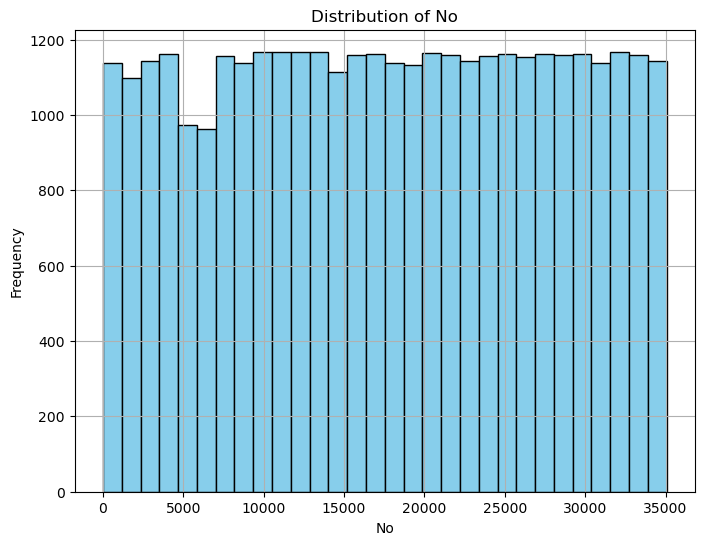

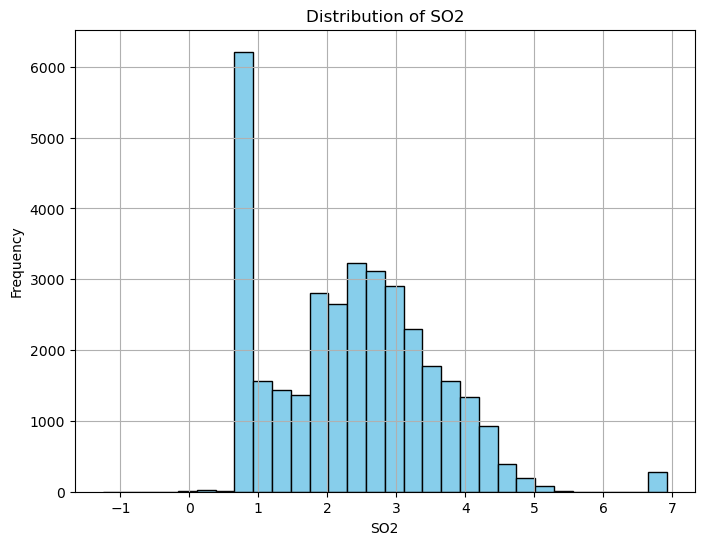

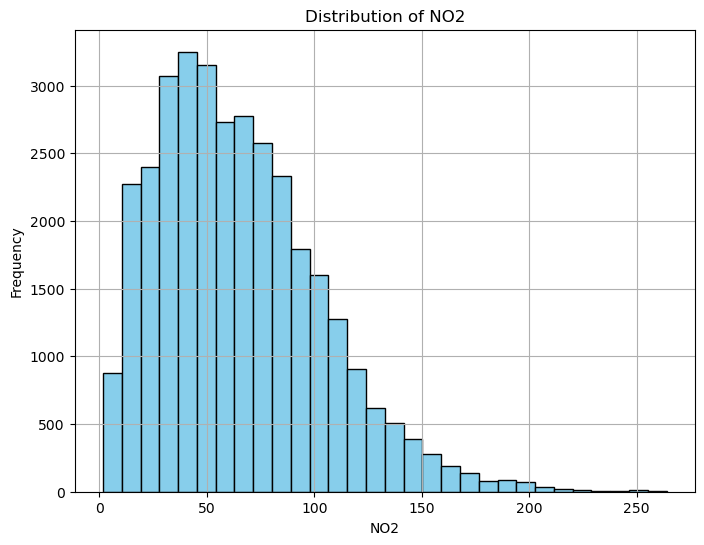

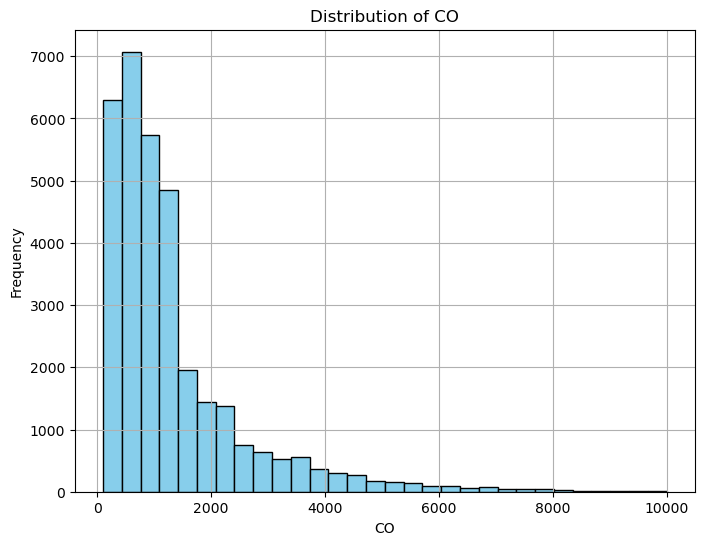

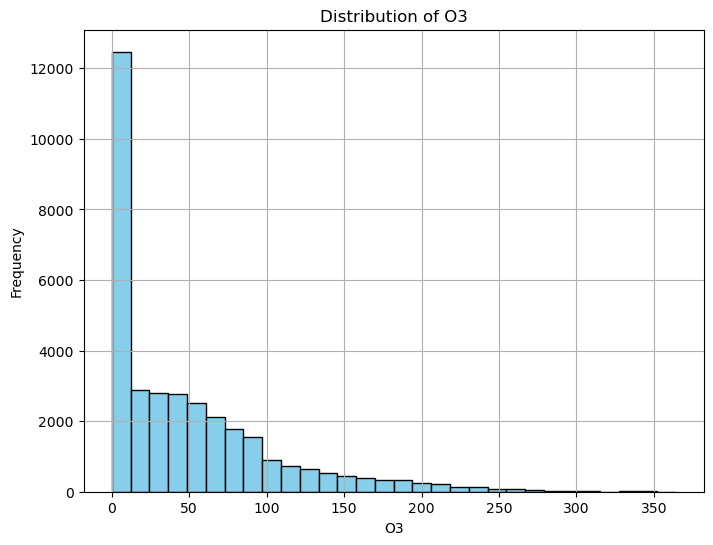

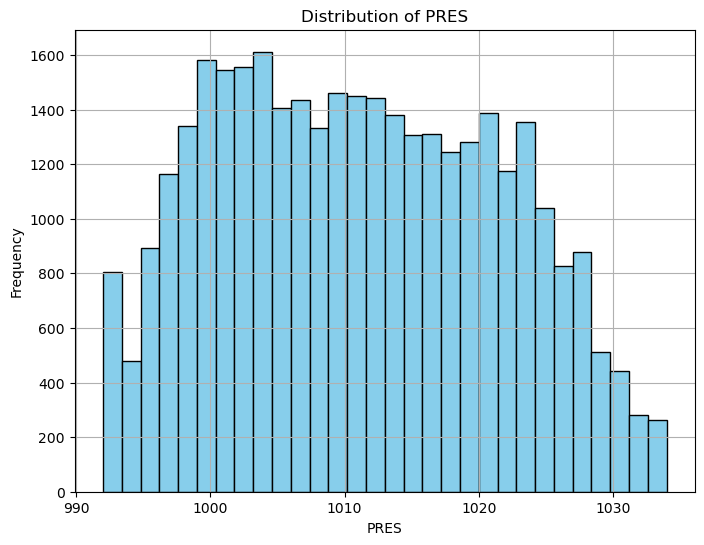

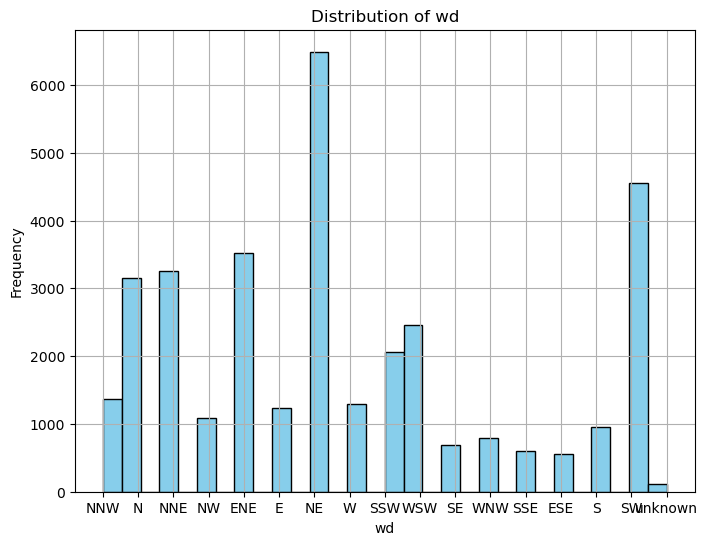

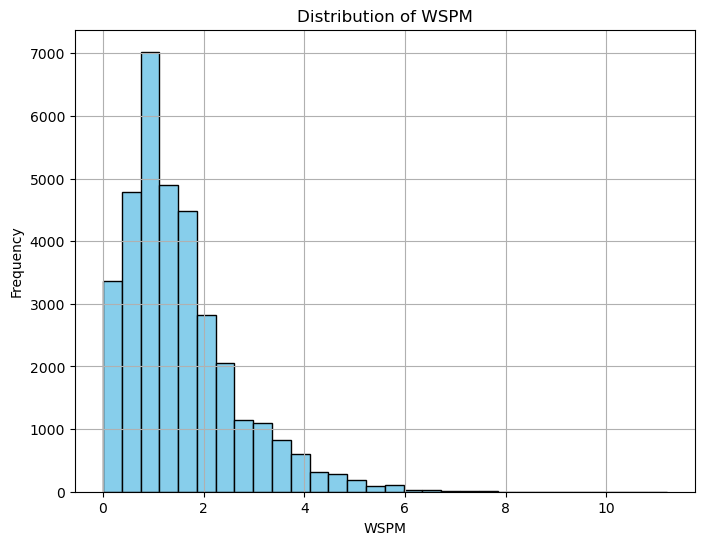

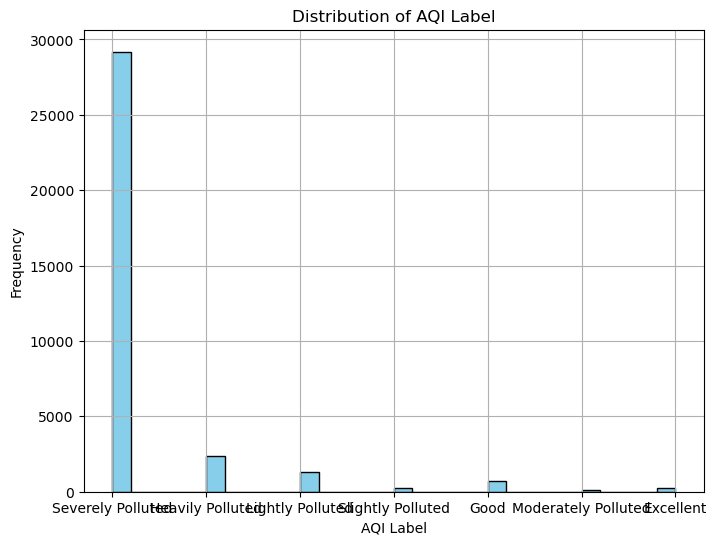

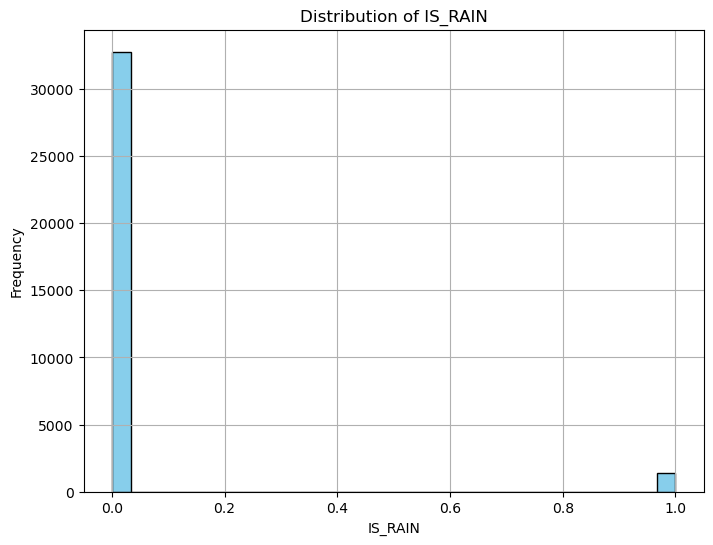

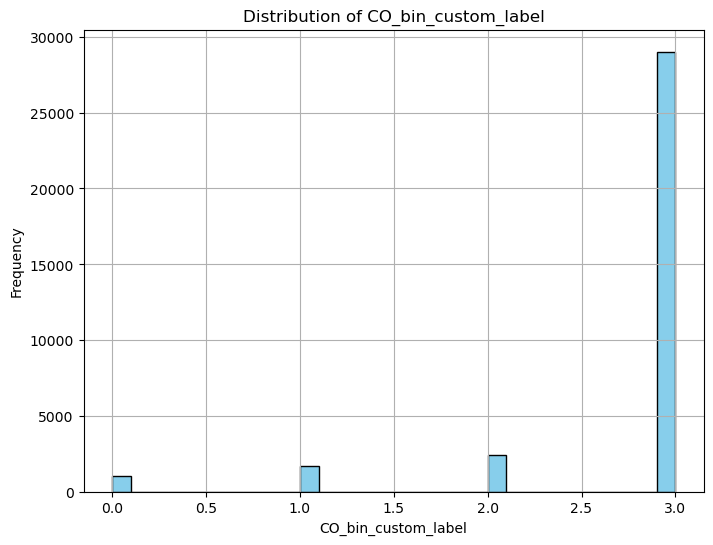

In [48]:
for column in prsa_data.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(prsa_data[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

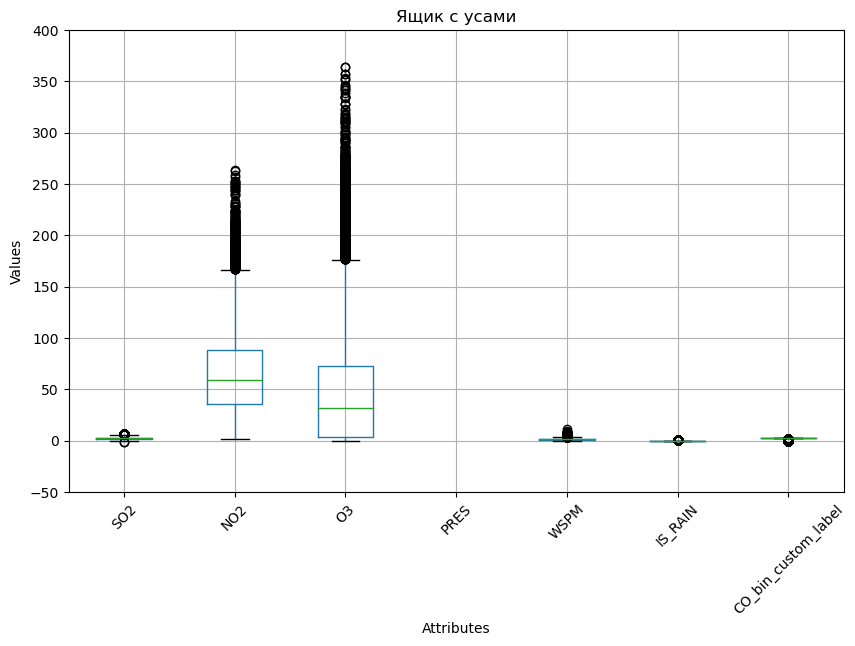

In [55]:
plt.figure(figsize=(10, 6))
task5.boxplot()
plt.title('Ящик с усами')
plt.xlabel('Attributes')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.ylim(-50, 400)
plt.grid(True)
plt.show()

# 2. При выполнении 6 задания мы явно подбирали руками границы диапазона для клиппинга. Реализуйте адаптивный клиппинг через процентили.

In [58]:
lower_percentile = np.percentile(prsa_data['PRES'], 5)
upper_percentile = np.percentile(prsa_data['PRES'], 95)
task2 = prsa_data
task2['PRES_clipped'] = task2['PRES'].clip(lower=lower_percentile, upper=upper_percentile)
task2

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label,PRES_clipped
0,0,1,1.791759,28.0,400.0,52,1023.0,NNW,4.4,Severely Polluted,0.0,3,1023.0
1,1,2,1.791759,28.0,400.0,50,1023.2,N,4.7,Severely Polluted,0.0,3,1023.2
2,2,3,6.918751,19.0,400.0,55,1023.5,NNW,5.6,Severely Polluted,0.0,3,1023.5
4,4,5,2.197225,NaN,300.0,54,1025.2,N,2.0,Heavily Polluted,0.0,2,1025.2
5,5,6,2.079442,17.0,300.0,54,1025.6,N,3.7,Heavily Polluted,0.0,2,1025.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35059,35060,1.386294,20.0,300.0,81,1011.9,N,2.0,Heavily Polluted,0.0,2,1011.9
35060,35060,35061,1.791759,55.0,500.0,45,1012.3,WSW,1.0,Severely Polluted,0.0,3,1012.3
35061,35061,35062,1.945910,48.0,500.0,48,1012.8,N,1.1,Severely Polluted,0.0,3,1012.8
35062,35062,35063,1.609438,47.0,500.0,50,1012.9,NNE,1.0,Severely Polluted,0.0,3,1012.9


# 3. Избавьтесь от оставшихся пропусков в данных. Самостоятельно выберите метод.

In [59]:
prsa_data_interpolated = prsa_data.interpolate(method='linear')
prsa_data_interpolated

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label,PRES_clipped
0,0,1,1.791759,28.0,400.0,52,1023.0,NNW,4.4,Severely Polluted,0.0,3,1023.0
1,1,2,1.791759,28.0,400.0,50,1023.2,N,4.7,Severely Polluted,0.0,3,1023.2
2,2,3,6.918751,19.0,400.0,55,1023.5,NNW,5.6,Severely Polluted,0.0,3,1023.5
4,4,5,2.197225,18.0,300.0,54,1025.2,N,2.0,Heavily Polluted,0.0,2,1025.2
5,5,6,2.079442,17.0,300.0,54,1025.6,N,3.7,Heavily Polluted,0.0,2,1025.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35059,35060,1.386294,20.0,300.0,81,1011.9,N,2.0,Heavily Polluted,0.0,2,1011.9
35060,35060,35061,1.791759,55.0,500.0,45,1012.3,WSW,1.0,Severely Polluted,0.0,3,1012.3
35061,35061,35062,1.945910,48.0,500.0,48,1012.8,N,1.1,Severely Polluted,0.0,3,1012.8
35062,35062,35063,1.609438,47.0,500.0,50,1012.9,NNE,1.0,Severely Polluted,0.0,3,1012.9


In [63]:
dates = pd.date_range('2022-01-01', periods=10)
data = {'value': [1, 2, np.nan, 4, np.nan, 6, np.nan, 8, 9, 10]}
df = pd.DataFrame(data, index=dates)
df_interpolated = df.interpolate(method='linear')
print("Исходные данные:")
print(df)
print("После линейной интерполяции:")
print(df_interpolated)

Исходные данные:
            value
2022-01-01    1.0
2022-01-02    2.0
2022-01-03    NaN
2022-01-04    4.0
2022-01-05    NaN
2022-01-06    6.0
2022-01-07    NaN
2022-01-08    8.0
2022-01-09    9.0
2022-01-10   10.0
После линейной интерполяции:
            value
2022-01-01    1.0
2022-01-02    2.0
2022-01-03    3.0
2022-01-04    4.0
2022-01-05    5.0
2022-01-06    6.0
2022-01-07    7.0
2022-01-08    8.0
2022-01-09    9.0
2022-01-10   10.0


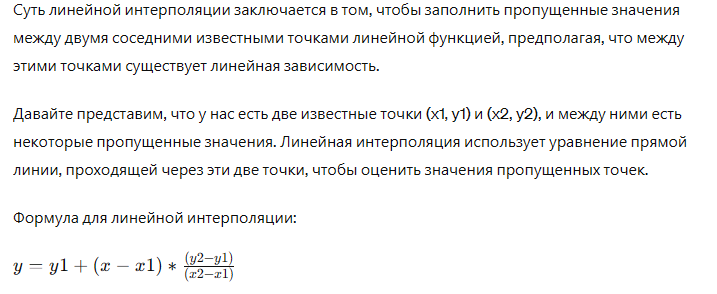

# 4. Проведите нормализацию численных признаков. Выберите наиболее подходящий вид нормализации для каждого признака.

In [66]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Создаем объекты нормализаторов
scaler_z = StandardScaler()
scaler_minmax = MinMaxScaler()

# Применяем Z-нормализацию к данным
X_z_normalized = scaler_z.fit_transform(task5)

# Применяем Мин-Макс нормализацию к данным
X_minmax_normalized = scaler_minmax.fit_transform(task5)

X_z_normalized

array([[-0.45717623, -0.97230684,  0.05702409, ...,  2.6097666 ,
        -0.20819593,  0.37898193],
       [-0.45717623, -0.97230684,  0.0207796 , ...,  2.88064537,
        -0.20819593,  0.37898193],
       [ 3.83339777, -1.20883141,  0.11139081, ...,  3.69328167,
        -0.20819593,  0.37898193],
       ...,
       [-0.32817369, -0.44669667, -0.01546488, ..., -0.36989983,
        -0.20819593,  0.37898193],
       [-0.60975385, -0.47297718,  0.0207796 , ..., -0.46019275,
        -0.20819593,  0.37898193],
       [-0.45717623,  0.55196265, -0.68598779, ..., -0.36989983,
        -0.20819593,  0.37898193]])

In [67]:
X_minmax_normalized

array([[0.37260826, 0.1004644 , 0.14285714, ..., 0.39285714, 0.        ,
        1.        ],
       [0.37260826, 0.1004644 , 0.13736264, ..., 0.41964286, 0.        ,
        1.        ],
       [1.        , 0.06616008, 0.1510989 , ..., 0.5       , 0.        ,
        1.        ],
       ...,
       [0.39147173, 0.17669623, 0.13186813, ..., 0.09821429, 0.        ,
        1.        ],
       [0.35029751, 0.17288464, 0.13736264, ..., 0.08928571, 0.        ,
        1.        ],
       [0.37260826, 0.32153671, 0.03021978, ..., 0.09821429, 0.        ,
        1.        ]])

Мин-Макс нормализация масштабирует данные в диапазоне от 0 до 1, сохраняя относительные пропорции между значениями. Это может быть полезно, когда необходимо сохранить интерпретируемость данных и когда алгоритмы машинного обучения требуют, чтобы признаки находились в определенном диапазоне.

Z-нормализация (стандартизация) центрирует данные относительно их среднего значения и масштабирует их относительно стандартного отклонения. Это полезно, когда данные имеют нормальное распределение или когда модели чувствительны к масштабированию признаков.

# 5. Постройте кореллограмму по всем численным столбцам датасета. Сделайте вывод о значимости признаков.

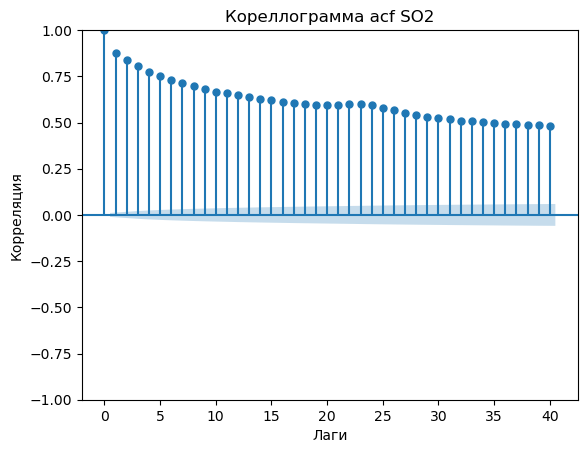

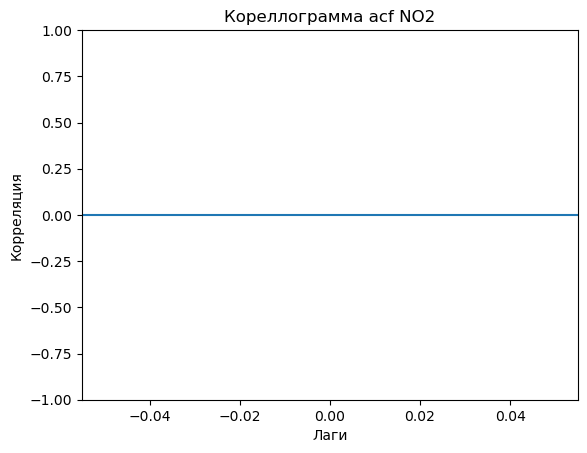

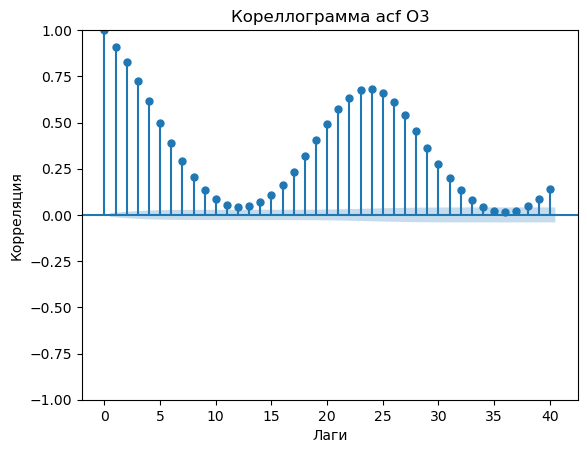

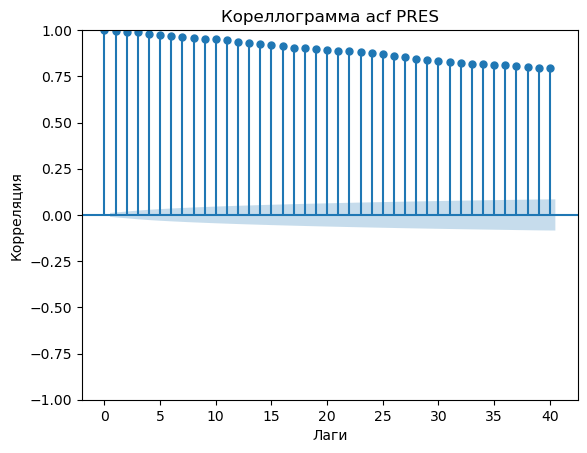

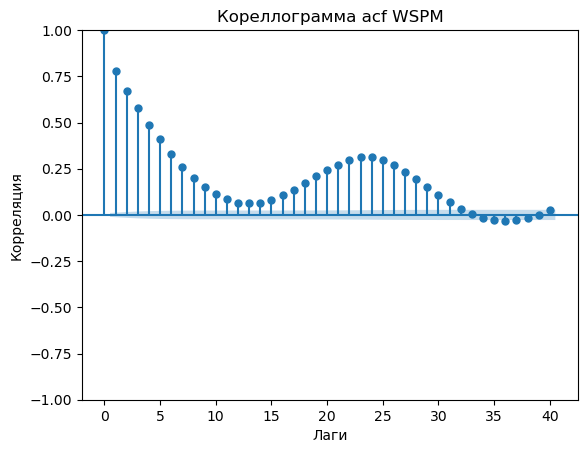

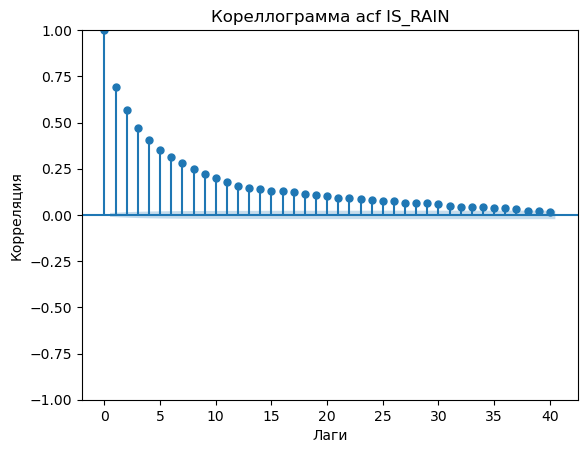

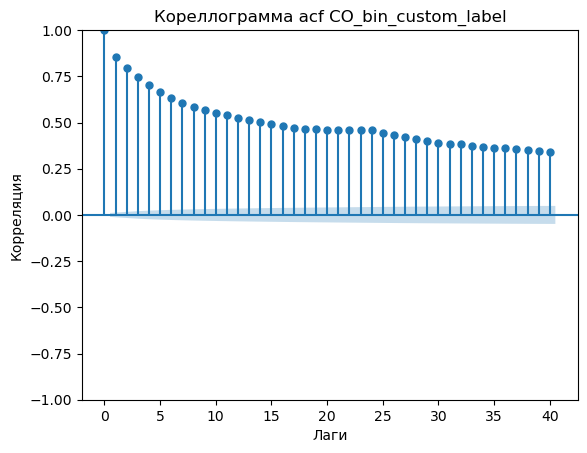

In [46]:
for column in task5.columns:
    if task5[column].dtype != 'object':
        plot_acf(task5[column], lags=40, title=f'Кореллограмма acf {column}')
        plt.xlabel('Лаги')
        plt.ylabel('Корреляция')
        plt.show()

In [ ]:
# Убывающая прямая - значения временного ряда в прошлом негативно коррелируют с его значениями в будущем.
# Убывающий тренд или периодические колебания с постепенным снижением амплитуды

# Пустой график - ни положительной, ни отрицательной зависимости

# Волновой график - периодические закономерности или сезонные колебания. 



# 6. Визуализируйте связи между признаками. Сделайте вывод об их взаимозависимости.

In [35]:
prsa_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34180 entries, 0 to 35063
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           34180 non-null  int64  
 1   No                   34180 non-null  int64  
 2   SO2                  34180 non-null  float64
 3   NO2                  33478 non-null  float64
 4   CO                   33152 non-null  float64
 5   O3                   34180 non-null  int32  
 6   PRES                 34180 non-null  float64
 7   wd                   34180 non-null  object 
 8   WSPM                 34180 non-null  float64
 9   AQI Label            34180 non-null  object 
 10  IS_RAIN              34180 non-null  float64
 11  CO_bin_custom_label  34180 non-null  int32  
dtypes: float64(6), int32(2), int64(2), object(2)
memory usage: 3.1+ MB


In [37]:
prsa_data

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label
0,0,1,1.791759,28.0,400.0,52,1023.0,NNW,4.4,Severely Polluted,0.0,3
1,1,2,1.791759,28.0,400.0,50,1023.2,N,4.7,Severely Polluted,0.0,3
2,2,3,6.918751,19.0,400.0,55,1023.5,NNW,5.6,Severely Polluted,0.0,3
4,4,5,2.197225,NaN,300.0,54,1025.2,N,2.0,Heavily Polluted,0.0,2
5,5,6,2.079442,17.0,300.0,54,1025.6,N,3.7,Heavily Polluted,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35059,35060,1.386294,20.0,300.0,81,1011.9,N,2.0,Heavily Polluted,0.0,2
35060,35060,35061,1.791759,55.0,500.0,45,1012.3,WSW,1.0,Severely Polluted,0.0,3
35061,35061,35062,1.945910,48.0,500.0,48,1012.8,N,1.1,Severely Polluted,0.0,3
35062,35062,35063,1.609438,47.0,500.0,50,1012.9,NNE,1.0,Severely Polluted,0.0,3


In [38]:
task5 = prsa_data.drop(['wd', 'Unnamed: 0', 'No', 'AQI Label', 'CO'], axis=1)
task5

,SO2,NO2,O3,PRES,WSPM,IS_RAIN,CO_bin_custom_label
0,1.791759,28.0,52,1023.0,4.4,0.0,3
1,1.791759,28.0,50,1023.2,4.7,0.0,3
2,6.918751,19.0,55,1023.5,5.6,0.0,3
4,2.197225,NaN,54,1025.2,2.0,0.0,2
5,2.079442,17.0,54,1025.6,3.7,0.0,2
...,...,...,...,...,...,...,...
35059,1.386294,20.0,81,1011.9,2.0,0.0,2
35060,1.791759,55.0,45,1012.3,1.0,0.0,3
35061,1.945910,48.0,48,1012.8,1.1,0.0,3
35062,1.609438,47.0,50,1012.9,1.0,0.0,3


<AxesSubplot:>

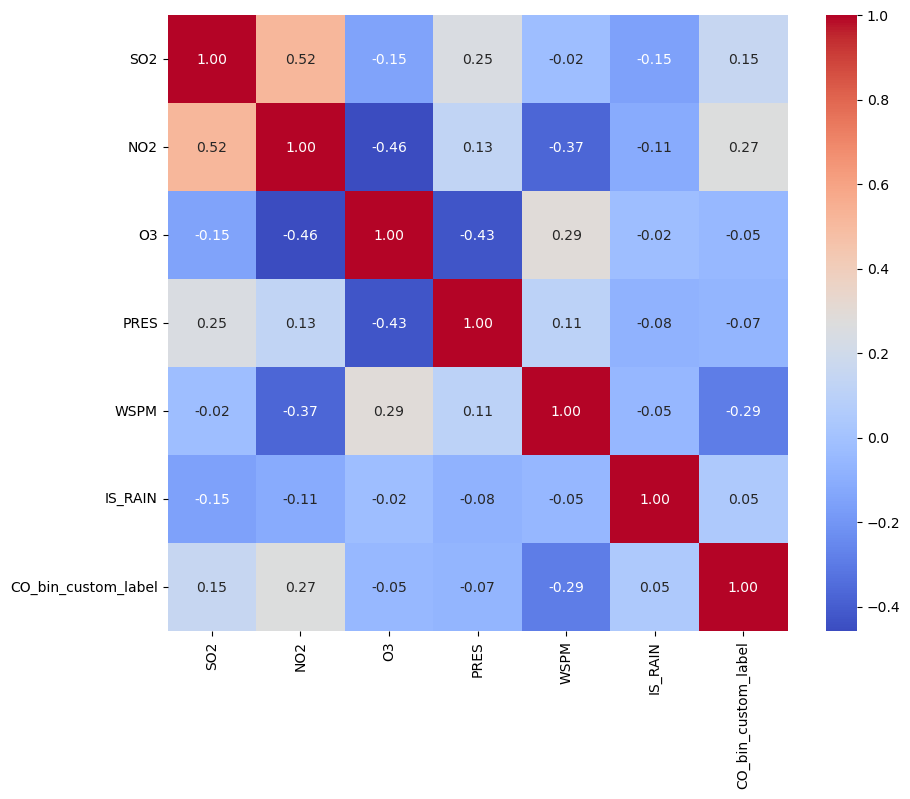

In [47]:
plt.figure(figsize=(10, 8))
sns.heatmap(task5[[col for col in task5.columns]].corr(), annot=True, cmap='coolwarm', fmt=".2f")
# примеси различных газов при измерении качества воздуха
# rain - отсутствие осадков
# SO2 - диоксид серы
# NO2 - диоксид азота
# CO - оксид углерода
# O3 - тройной кислород, также известный как озон